# Balance Data:

#### - Check if the data is balanced or not:

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Dataset/Preprocessed_dataset.csv')

# Access the 'outcome' column
outcomes = data['outcome']

# Count occurrences of each outcome
num_home_wins = outcomes[outcomes == 2].count()
num_away_wins = outcomes[outcomes == 0].count()
num_draws = outcomes[outcomes == 1].count()

# Calculate the total number of entries
total = num_home_wins + num_away_wins + num_draws

# Calculate the percentage of each outcome
percentage_home_wins = (num_home_wins / total) * 100
percentage_away_wins = (num_away_wins / total) * 100
percentage_draws = (num_draws / total) * 100

# Print the counts and percentages
print("Number of Home Wins:", num_home_wins)
print("Number of Away Wins:", num_away_wins)
print("Number of Draws:", num_draws)
print("_")
print("Percentage of Home Wins: {:.2f}%".format(percentage_home_wins))
print("Percentage of Away Wins: {:.2f}%".format(percentage_away_wins))
print("Percentage of Draws: {:.2f}%".format(percentage_draws))

Number of Home Wins: 429
Number of Away Wins: 302
Number of Draws: 169
_
Percentage of Home Wins: 47.67%
Percentage of Away Wins: 33.56%
Percentage of Draws: 18.78%


#### -Import libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")
%pip install imbalanced.learn
%pip install kneed


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


#### - Process of correcting data balancing:

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv('Dataset/Preprocessed_dataset.csv')

encoder = LabelEncoder()

# Apply encoding on some column if necessary, here just to ensure encoder is used
# Typically you would encode a categorical column that is not numeric
# Example if needed: df['some_categorical_column'] = encoder.fit_transform(df['some_categorical_column'])

# Define binary outcome based on 'outcome' column
df['Binary_outcome'] = df['outcome'].apply(lambda x: 1 if x in [1, 2] else 0)

# Preparing the data for SMOTE
X = df.drop(['Binary_outcome'], axis=1)  # exclude 'outcome' to avoid leakage
y = df['Binary_outcome']

# Oversample the "Low" class using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled X and y into a single DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Binary_outcome'] = y_resampled  # Correctly add the resampled binary outcome

# Optionally, add the original 'outcome' if still required:
# df_resampled['outcome'] = df.loc[y_resampled.index, 'outcome']

# Print the new distribution of the target variable
print(pd.Series(y_resampled).value_counts())

# Save the processed dataset to hard drive
df_resampled.to_csv('Dataset/Balanced_dataset.csv', index=False)

Binary_outcome
1    598
0    598
Name: count, dtype: int64


#### - Data after the balancing process:

In [4]:
import pandas as pd

# Assuming 'resampled_df' contains the balanced dataset with the 'Binary_outcome' column
# Load the balanced dataset if needed
resampled_df = pd.read_csv('Dataset/Balanced_dataset.csv')

# Calculate the distribution of the target variable
distribution = resampled_df['Binary_outcome'].value_counts()

# Calculate total number of instances in the balanced dataset
total_resampled = distribution.sum()

# Calculate percentages
percentage_1 = (distribution[1] / total_resampled) * 100  # Percentage of Home wins + Draws
percentage_0 = (distribution[0] / total_resampled) * 100  # Percentage of Away wins

# Print the percentages
print("Percentage of Home wins and Draws combined: {:.2f}%".format(percentage_1))
print("Percentage of Away wins: {:.2f}%".format(percentage_0))

Percentage of Home wins and Draws combined: 50.00%
Percentage of Away wins: 50.00%


# Loading data:

In [5]:
import pandas as pd
from scipy import stats
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import tree
df = pd.read_csv('Dataset/Balanced_dataset.csv');
print(df)

      year  country  city  stage  home_team  away_team  home_score  \
0     1930       16    83      3         27         42    0.400000   
1     1930       16    83      6          5         76    0.000000   
2     1930       16    83      4          8         80    0.100000   
3     1930       16    83      5         52         56    0.100000   
4     1930       16    83      3          2         27    0.100000   
...    ...      ...   ...    ...        ...        ...         ...   
1191  1962        2   120     14         10         17    0.160317   
1192  2015        4   115     12         41          8    0.049527   
1193  2008        8    19     18         75         39    0.147697   
1194  1994       15    33     17         15         39    0.066706   
1195  2011        6    62      6         39         67    0.000000   

      away_score  outcome  win_conditions  winning_team  losing_team  date  \
0       0.100000        2              48            22           46     0   
1  

# Feature Selection:

In [6]:
fn= df.keys().tolist()[:-1]
X= df[fn]
y=df['outcome']
X



,year,country,city,stage,home_team,away_team,home_score,away_score,outcome,win_conditions,winning_team,losing_team,date,month,dayofweek,Year_Decade
0,1930,16,83,3,27,42,0.400000,0.100000,2,48,22,46,0,0,3,0
1,1930,16,83,6,5,76,0.000000,0.300000,0,48,62,5,0,0,3,0
2,1930,16,83,4,8,80,0.100000,0.200000,0,48,66,8,1,0,1,0
3,1930,16,83,5,52,56,0.100000,0.300000,0,48,45,56,1,0,1,0
4,1930,16,83,3,2,27,0.100000,0.000000,2,48,1,30,2,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,1962,2,120,14,10,17,0.160317,0.439683,0,48,13,10,59,1,4,2
1192,2015,4,115,12,41,8,0.049527,0.149527,0,48,6,45,327,1,2,7
1193,2008,8,19,18,75,39,0.147697,0.273848,0,48,30,79,292,0,3,6
1194,1994,15,33,17,15,39,0.066706,0.200000,0,48,30,16,197,0,5,5


# Data Mining Technique

## Classification:

### Information Gain (entropy):

The model is trained utilizing the information gain(entropy), and the dataset is divided into 70% training and 30% testing subsets.

In [7]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(criterion='entropy')

clf = clf. fit (X_train, y_train)

y_pred = clf.predict (X_test)


### confusion matrix:

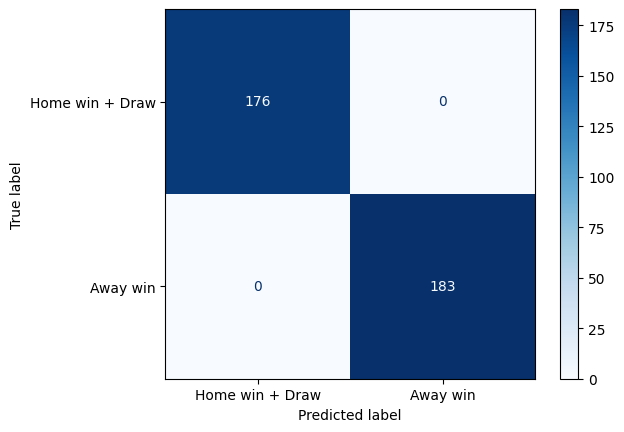

Confusion Matrix:
 [[176   0]
 [  0 183]]


In [10]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the balanced dataset
df = pd.read_csv('Dataset/Balanced_dataset.csv')

# Select features (X) and target (y)
X = df.drop(['Binary_outcome'], axis=1)  # Exclude the 'Binary_outcome' from features
y = df['Binary_outcome']  # Target variable

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
class_labels = {1: 'Home win + Draw', 0: 'Away win'}  # Define class labels based on 'Binary_outcome'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[1], class_labels[0]])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", cm)


### Decision Tree:

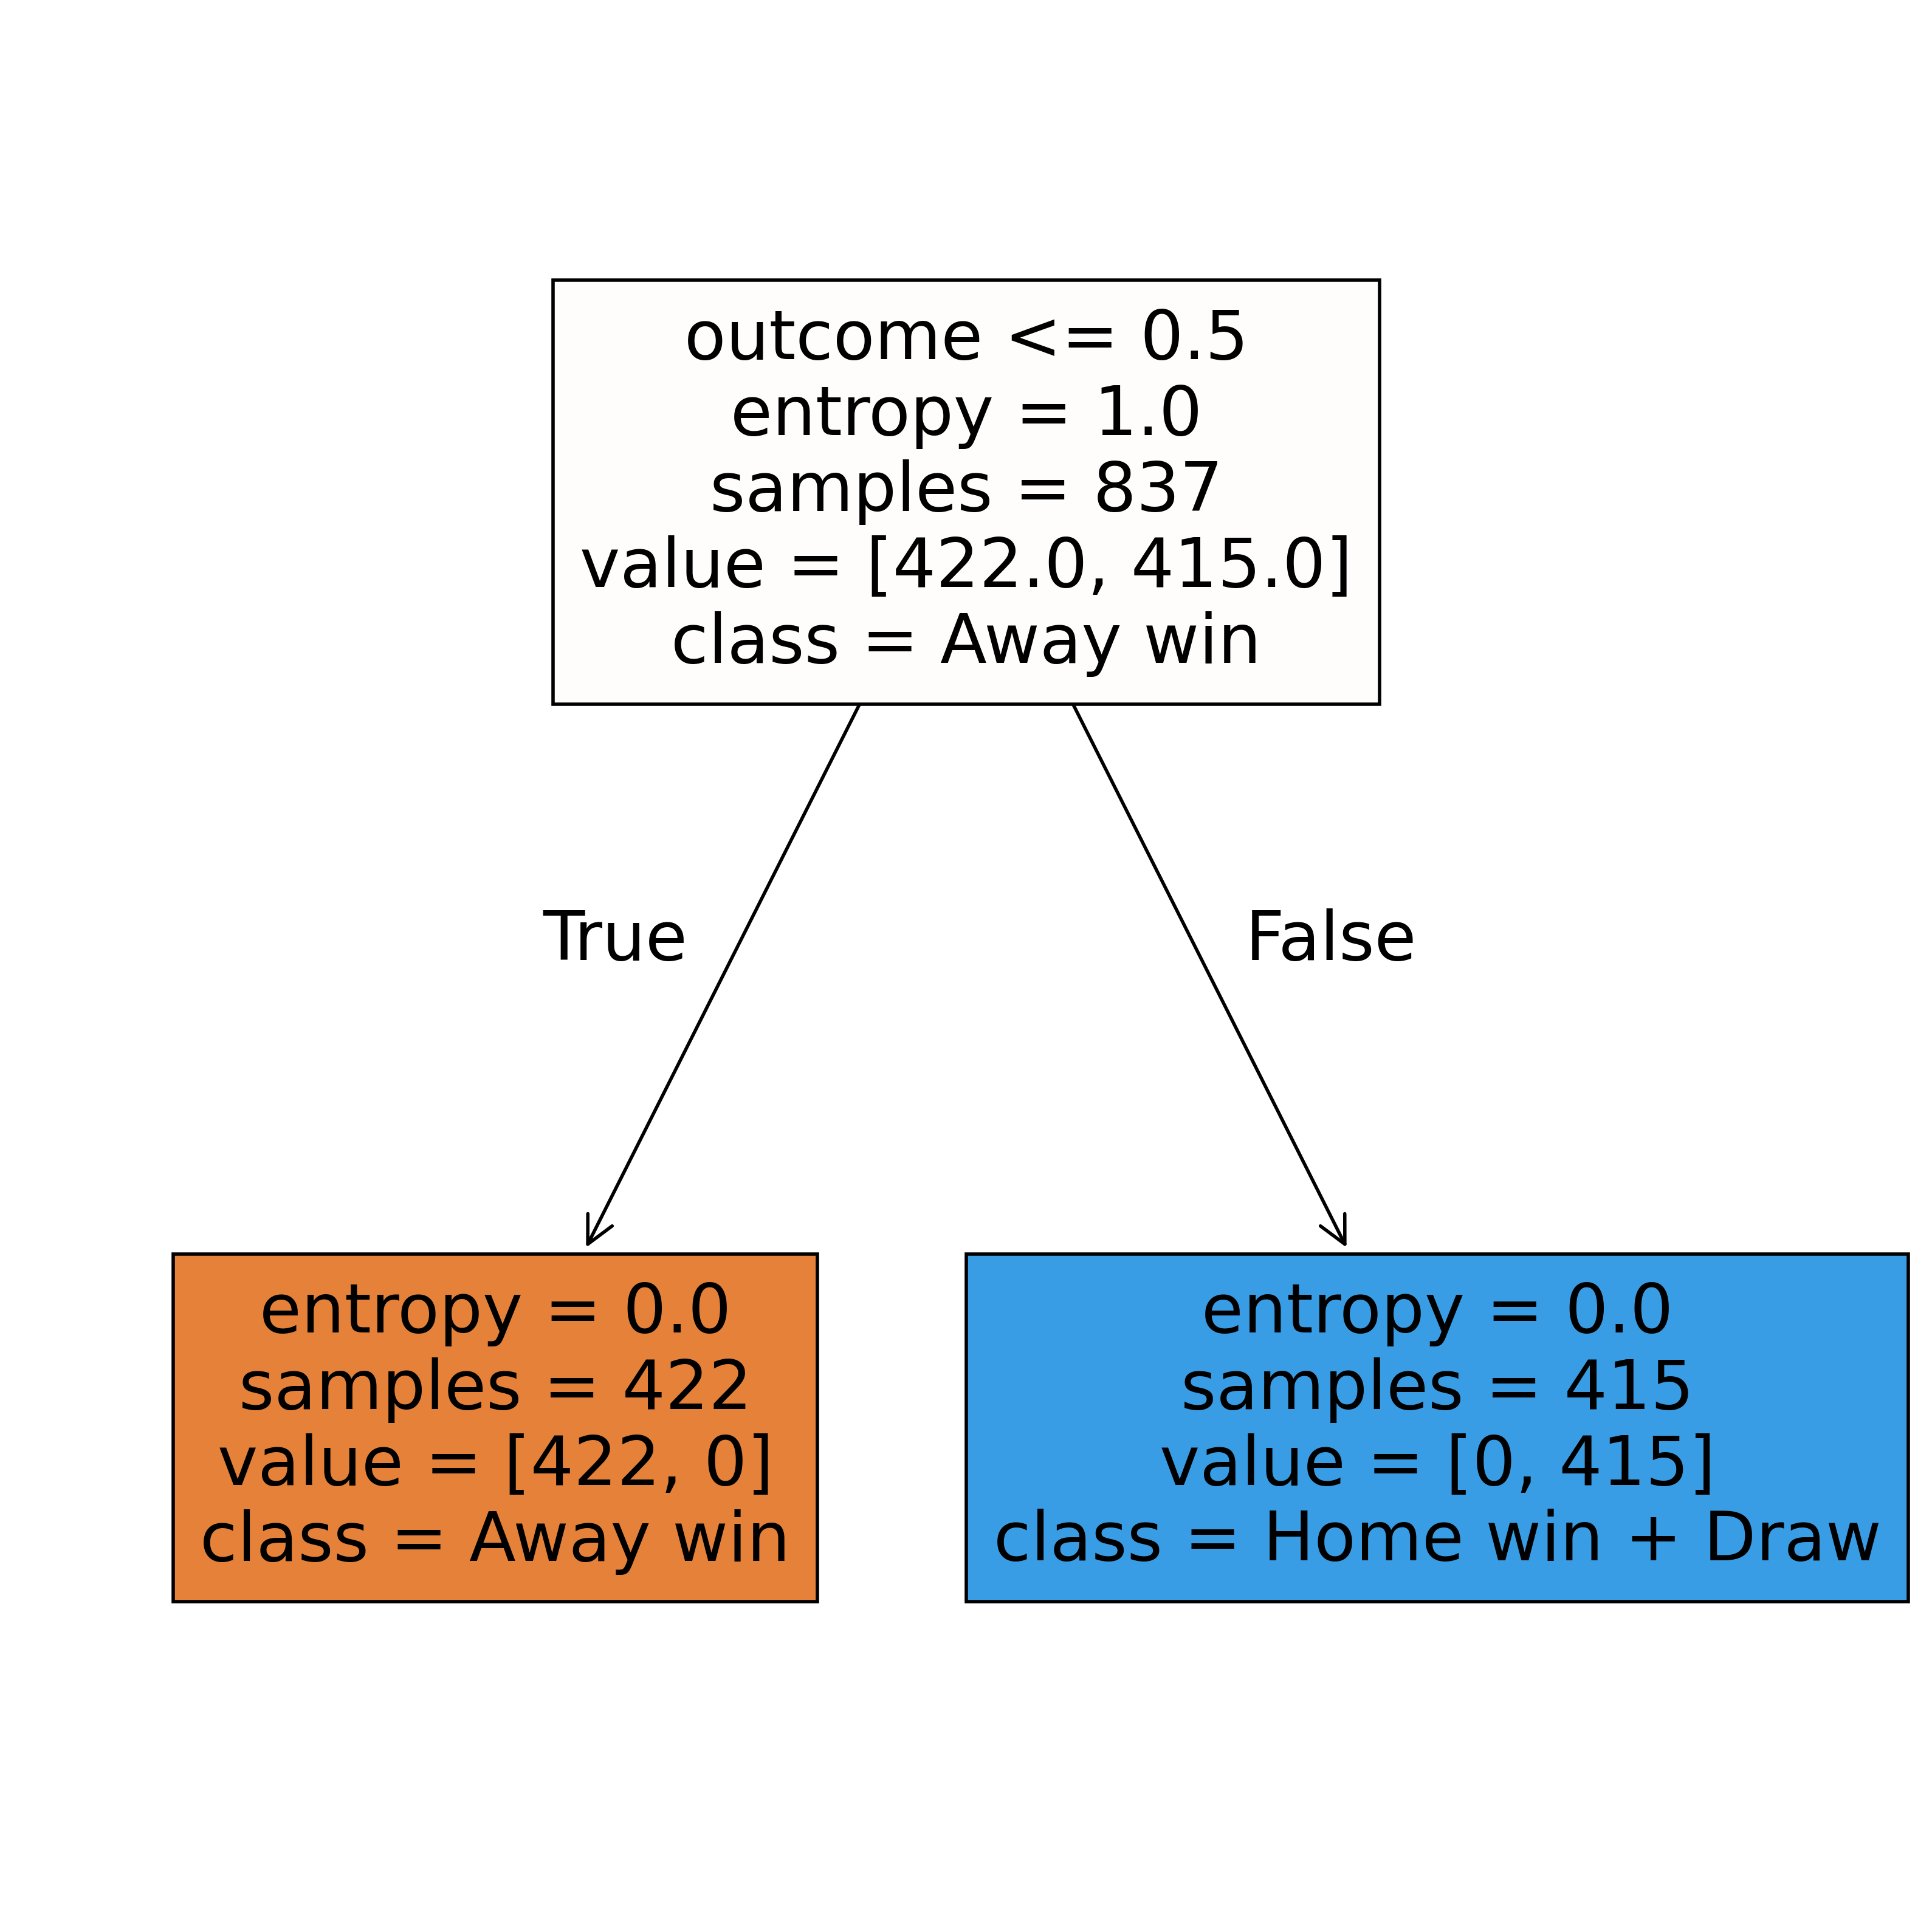

In [14]:
import matplotlib.pyplot as plt
from sklearn import tree

# Define the feature names based on your dataset
fn = df.keys().tolist()[:-1]  # Exclude the 'Binary_outcome' column

# Define the class labels for your dataset
class_labels = {0: 'Away win', 1: 'Home win + Draw'}

# Create the decision tree plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=400)

# Plot the decision tree
tree.plot_tree(clf,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]],
               filled=True)

# Show the plot
plt.show()



### Completing in model evaluation and selection:

Confusion Matrix: 
 [[176   0]
 [  0 183]]
Accuracy: 1.0
Error Rate: 0.0
Sensitivity (Recall): 1.0
Specificity: 1.0
Precision: 1.0


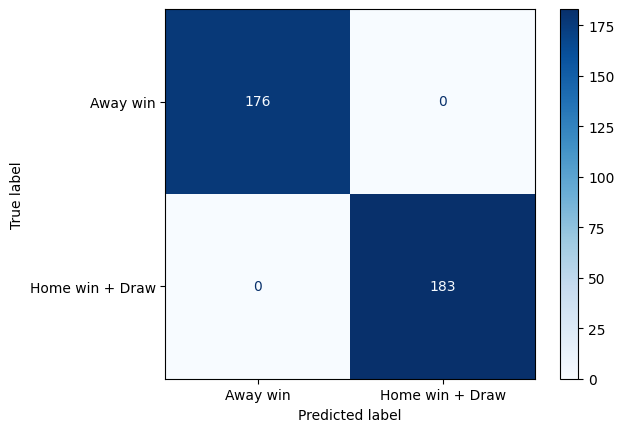

In [15]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# حساب مصفوفة الارتباك
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

# حساب الدقة
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# حساب معدل الخطأ
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# حساب الحساسية (الاسترجاع) والخصوصية باستخدام TP, TN, FP, FN:
TP = cm[1, 1]  # عدد الصحيحين من الفئة الإيجابية
TN = cm[0, 0]  # عدد الصحيحين من الفئة السلبية
FP = cm[0, 1]  # عدد الحالات السلبية التي تم تصنيفها كإيجابية
FN = cm[1, 0]  # عدد الحالات الإيجابية التي تم تصنيفها كسلبية

# الحساسية (الاسترجاع)
sensitivity = TP / (TP + FN)
print("Sensitivity (Recall):", sensitivity)

# الخصوصية
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# الدقة
precision = TP / (TP + FP)
print("Precision:", precision)

# (اختياري) عرض مصفوفة الارتباك باستخدام اللون لزيادة وضوح النتيجة:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Away win', 'Home win + Draw'])
disp.plot(cmap=plt.cm.Blues)
plt.show()
